# **Step 1: Importing Libraries and Loading the Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data Sets/hotel_bookings.csv')
print(df.head())

Mounted at /content/drive
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  .

> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

In [3]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [4]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')


# **Step 2: Understanding the Dataset**



In [5]:
# Display the first few rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Observations**
---
1. There are 119390 rows and 32 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
     
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.

In [7]:
df.sample(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
55663,City Hotel,1,178,2016,August,34,18,0,3,1,1.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,124.50,0,0,Canceled,2016-02-22
104566,City Hotel,0,1,2017,January,2,14,2,1,2,0.0,0,HB,FRA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,83.0,NaN,0,Transient,175.20,0,0,Check-Out,2017-01-17
36354,Resort Hotel,0,1,2017,May,20,17,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,76.00,0,0,Check-Out,2017-05-18
66001,City Hotel,1,219,2017,April,15,12,0,4,2,0.0,0,BB,SWE,Direct,Direct,0,0,0,B,B,1,No Deposit,14.0,NaN,0,Transient,101.25,0,0,Canceled,2016-09-15
61689,City Hotel,1,89,2016,December,52,22,2,3,2,0.0,0,SC,USA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,74.80,0,1,Canceled,2016-09-29
20323,Resort Hotel,0,1,2016,January,4,22,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,48.00,0,1,Check-Out,2016-01-24
105732,City Hotel,0,36,2017,February,7,12,2,1,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,60.80,0,0,Check-Out,2017-02-15
88622,City Hotel,0,103,2016,May,19,5,1,3,2,0.0,0,BB,NOR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,7.0,NaN,0,Transient,95.88,0,1,Check-Out,2016-05-09
13260,Resort Hotel,1,178,2017,August,32,6,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,200.00,0,2,Canceled,2017-06-05
9885,Resort Hotel,1,40,2017,January,3,16,1,2,1,0.0,0,Undefined,PRT,Groups,Direct,0,0,0,A,A,1,No Deposit,NaN,NaN,0,Transient-Party,55.00,0,0,Canceled,2017-01-10


- `df.sample(50)` gives us whole picture or idea about data.

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- let's see the exact column names which can be easily copied later

In [9]:
# Descriptive statistics
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


\- `describe(include='all')` gives statistical insights for both numeric and categorical columns.


In [10]:
# Define a mapping for meal codes to their full forms
meal_mapping = {
    "BB": "Bed and Breakfast",
    "FB": "Full Board",
    "HB": "Half Board",
    "SC": "Self Catering",
    "Undefined": "Undefined"
}

# Create a new column with the Meal plan names
df['Meal'] = df['meal'].map(meal_mapping)

# Display the updated DataFrame
print(df[['meal', 'Meal']].head())


  meal               Meal
0   BB  Bed and Breakfast
1   BB  Bed and Breakfast
2   BB  Bed and Breakfast
3   BB  Bed and Breakfast
4   BB  Bed and Breakfast


### Explanation:
1. **Mapping Dictionary**: A dictionary is used to map the meal codes to their corresponding full descriptions.
2. **`map` Function**: The `map` method applies the dictionary mapping to each value in the `meal` column.
3. **New Column**: A new column (`Meal`) is created to store the full forms, leaving the original `meal` column unchanged.

After running this code, our DataFrame will have a new column called `Meal` with descriptive values like `"Bed and Breakfast"`, `"Full Board"`, etc.

In [11]:
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [12]:
# Dictionary mapping country codes to country names
country_mapping = {
    'PRT': 'Portugal', 'GBR': 'United Kingdom', 'USA': 'United States', 'ESP': 'Spain',
    'IRL': 'Ireland', 'FRA': 'France', 'ROU': 'Romania', 'NOR': 'Norway', 'OMN': 'Oman',
    'ARG': 'Argentina', 'POL': 'Poland', 'DEU': 'Germany', 'BEL': 'Belgium', 'CHE': 'Switzerland',
    'CN': 'China', 'GRC': 'Greece', 'ITA': 'Italy', 'NLD': 'Netherlands', 'DNK': 'Denmark',
    'RUS': 'Russia', 'SWE': 'Sweden', 'AUS': 'Australia', 'EST': 'Estonia', 'CZE': 'Czech Republic',
    'BRA': 'Brazil', 'FIN': 'Finland', 'MOZ': 'Mozambique', 'BWA': 'Botswana', 'LUX': 'Luxembourg',
    'SVN': 'Slovenia', 'ALB': 'Albania', 'IND': 'India', 'CHN': 'China', 'MEX': 'Mexico',
    'MAR': 'Morocco', 'UKR': 'Ukraine', 'SMR': 'San Marino', 'LVA': 'Latvia', 'PRI': 'Puerto Rico',
    'SRB': 'Serbia', 'CHL': 'Chile', 'AUT': 'Austria', 'BLR': 'Belarus', 'LTU': 'Lithuania',
    'TUR': 'Turkey', 'ZAF': 'South Africa', 'AGO': 'Angola', 'ISR': 'Israel', 'CYM': 'Cayman Islands',
    'ZMB': 'Zambia', 'CPV': 'Cape Verde', 'ZWE': 'Zimbabwe', 'DZA': 'Algeria', 'KOR': 'South Korea',
    'CRI': 'Costa Rica', 'HUN': 'Hungary', 'ARE': 'United Arab Emirates', 'TUN': 'Tunisia',
    'JAM': 'Jamaica', 'HRV': 'Croatia', 'HKG': 'Hong Kong', 'IRN': 'Iran', 'GEO': 'Georgia',
    'AND': 'Andorra', 'GIB': 'Gibraltar', 'URY': 'Uruguay', 'JEY': 'Jersey', 'CAF': 'Central African Republic',
    'CYP': 'Cyprus', 'COL': 'Colombia', 'GGY': 'Guernsey', 'KWT': 'Kuwait', 'NGA': 'Nigeria',
    'MDV': 'Maldives', 'VEN': 'Venezuela', 'SVK': 'Slovakia', 'FJI': 'Fiji', 'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan', 'IDN': 'Indonesia', 'LBN': 'Lebanon', 'PHL': 'Philippines', 'SEN': 'Senegal',
    'SYC': 'Seychelles', 'AZE': 'Azerbaijan', 'BHR': 'Bahrain', 'NZL': 'New Zealand', 'THA': 'Thailand',
    'DOM': 'Dominican Republic', 'MKD': 'North Macedonia', 'MYS': 'Malaysia', 'ARM': 'Armenia',
    'JPN': 'Japan', 'LKA': 'Sri Lanka', 'CUB': 'Cuba', 'CMR': 'Cameroon', 'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius', 'COM': 'Comoros', 'SUR': 'Suriname', 'UGA': 'Uganda', 'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast', 'JOR': 'Jordan', 'SYR': 'Syria', 'SGP': 'Singapore', 'BDI': 'Burundi',
    'SAU': 'Saudi Arabia', 'VNM': 'Vietnam', 'PLW': 'Palau', 'QAT': 'Qatar', 'EGY': 'Egypt',
    'PER': 'Peru', 'MLT': 'Malta', 'MWI': 'Malawi', 'ECU': 'Ecuador', 'MDG': 'Madagascar',
    'ISL': 'Iceland', 'UZB': 'Uzbekistan', 'NPL': 'Nepal', 'BHS': 'Bahamas', 'MAC': 'Macau',
    'TGO': 'Togo', 'TWN': 'Taiwan', 'DJI': 'Djibouti', 'STP': 'Sao Tome and Principe', 'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia', 'IRQ': 'Iraq', 'HND': 'Honduras', 'RWA': 'Rwanda', 'KHM': 'Cambodia',
    'MCO': 'Monaco', 'BGD': 'Bangladesh', 'IMN': 'Isle of Man', 'TJK': 'Tajikistan', 'NIC': 'Nicaragua',
    'BEN': 'Benin', 'VGB': 'British Virgin Islands', 'TZA': 'Tanzania', 'GAB': 'Gabon',
    'GHA': 'Ghana', 'TMP': 'East Timor', 'GLP': 'Guadeloupe', 'KEN': 'Kenya', 'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau', 'MNE': 'Montenegro', 'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte', 'FRO': 'Faroe Islands', 'MMR': 'Myanmar', 'PAN': 'Panama', 'BFA': 'Burkina Faso',
    'LBY': 'Libya', 'MLI': 'Mali', 'NAM': 'Namibia', 'BOL': 'Bolivia', 'PRY': 'Paraguay',
    'BRB': 'Barbados', 'ABW': 'Aruba', 'AIA': 'Anguilla', 'SLV': 'El Salvador', 'DMA': 'Dominica',
    'PYF': 'French Polynesia', 'GUY': 'Guyana', 'LCA': 'Saint Lucia', 'ATA': 'Antarctica',
    'GTM': 'Guatemala', 'ASM': 'American Samoa', 'MRT': 'Mauritania', 'NCL': 'New Caledonia',
    'KIR': 'Kiribati', 'SDN': 'Sudan', 'ATF': 'French Southern Territories', 'SLE': 'Sierra Leone',
    'LAO': 'Laos'
    # Add more if required
}

# Map the country codes to names
df['Country'] = df['country'].map(country_mapping)

# Display the updated DataFrame
print(df[['country', 'Country']].head())


  country         Country
0     PRT        Portugal
1     PRT        Portugal
2     GBR  United Kingdom
3     GBR  United Kingdom
4     GBR  United Kingdom


### Explanation:
1. **`country_mapping` Dictionary**: This dictionary contains the mapping of country codes to their respective country names.
2. **`map` Method**: The `.map()` function applies the dictionary to the `country` column, replacing codes with full names.
3. **New Column**: A new column (`Country`) is created with the full country names.


In [13]:
df = df.drop(columns=['meal', 'country'])

We drop the meal and country columns becaue we ceate Meal and	Country new columns with full names instead of codes names

In [14]:
df.rename(columns={'adr': 'average_daily_rate'}, inplace=True)


We Rename column to make it more descriptive and standardized.

In [15]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

,0
company,112593
agent,16340
Country,488
children,4
reserved_room_type,0
Meal,0
reservation_status_date,0
reservation_status,0
total_of_special_requests,0
required_car_parking_spaces,0


- `df.isnull().sum().sort_values(ascending=False)` identifies missing values in each column.


In [16]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

,0
company,94.306893
agent,13.686238
Country,0.408744
children,0.003350
reserved_room_type,0.000000
Meal,0.000000
reservation_status_date,0.000000
reservation_status,0.000000
total_of_special_requests,0.000000
required_car_parking_spaces,0.000000


## Observations:
---
- We have 112593 missing values in the `'Company'` column, which is 94.30% of the total values in the column.
- We have 16340 missing values in the `'Agent '` column, which is 13.68% of the total values in the column.
- We have 488 missing values in the `'Country'` columns, which is 0.40% of the total values in the column.
- We have 4 missing values in the `'Children'` column, which is  0.003350% of the total values in the column.


- Let's plot the missing values in the dataset

<Axes: >

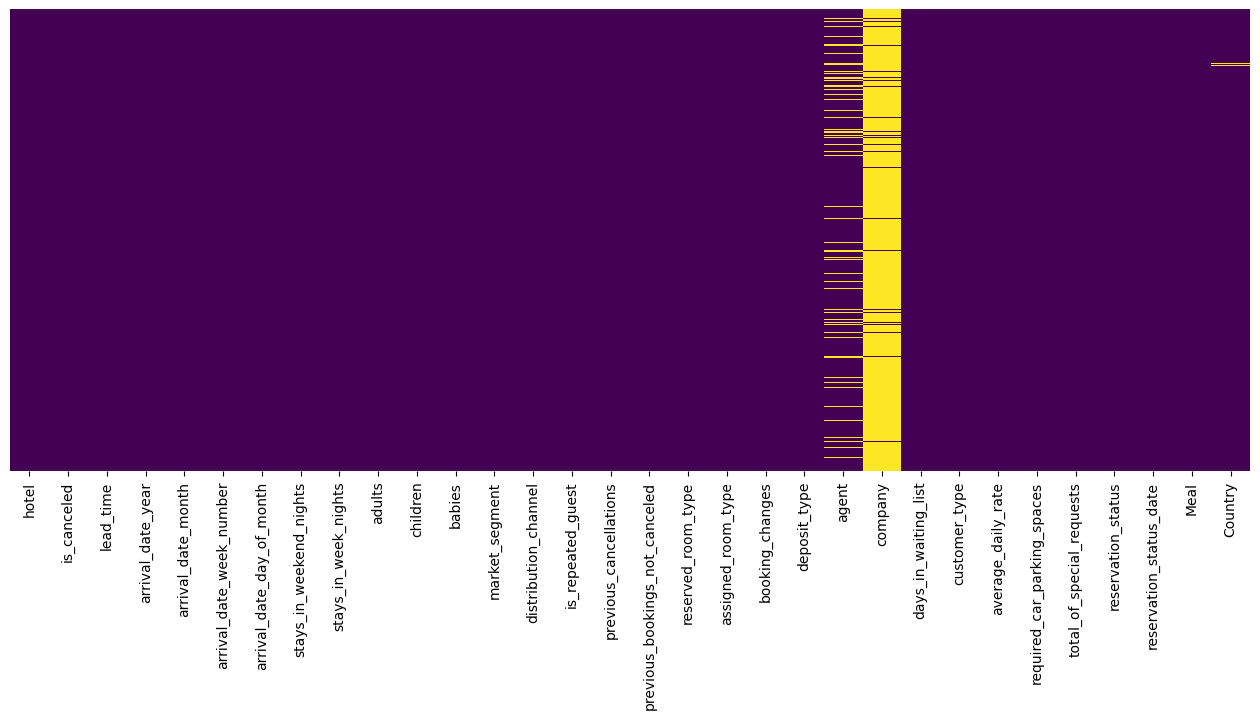

In [17]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe

#Step 3: Handling Missing Values



In [18]:
# Fill missing values in 'children' and 'agent' with 0 (assuming 0 means no children/agent)
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)

# Handle missing values in the 'company' column
df['company'] = df['company'].fillna('Unknown')


# Fill missing values in 'country' with 'Unknown'
df['Country'].fillna('Unknown', inplace=True)


**Explanation:**  
- Missing values in `children` and `agent` are replaced with 0 for practicality.
- The `company` column is dropped since most of its data is missing.
- Missing `country` values are replaced with `'Unknown'`.


#Step 4: Converting Data Types

In [19]:
# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Convert 'agent' to integer for simplicity
df['agent'] = df['agent'].astype(int)

**Explanation:**  
- The `reservation_status_date` column is converted to `datetime` for better handling of dates.
- The `agent` column is converted to `int` for easier analysis.


In [20]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in hotel column are: 119388
Number of duplicates in is_canceled column are: 119388
Number of duplicates in lead_time column are: 118911
Number of duplicates in arrival_date_year column are: 119387
Number of duplicates in arrival_date_month column are: 119378
Number of duplicates in arrival_date_week_number column are: 119337
Number of duplicates in arrival_date_day_of_month column are: 119359
Number of duplicates in stays_in_weekend_nights column are: 119373
Number of duplicates in stays_in_week_nights column are: 119355
Number of duplicates in adults column are: 119376
Number of duplicates in children column are: 119385
Number of duplicates in babies column are: 119385
Number of duplicates in market_segment column are: 119382
Number of duplicates in distribution_channel column are: 119385
Number of duplicates in is_repeated_guest column are: 119388
Number of duplicates in previous_cancellations column are: 119375
Number of duplicates in previous_bookings_not_cance

**Understand the Context:**
  - **Duplicate Hotel:** We have Two types of Hotels `Resort Hotel` and `City Hotel ` with the same name but different details.
  - **Duplicate country**: Duplicate country column occur because multiple country belong to the same category.
---


#Step 5: Feature Engineering

In [21]:
# Create a new column for total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Create a new column to indicate whether the booking includes children or babies
df['has_children'] = (df['children'] + df['babies'] > 0).astype(int)

**Explanation:**  
- `total_nights` combines weekend and weeknight stays into one metric.
- `has_children` is a binary feature indicating whether children or babies were part of the booking.


#Step 6: Outlier Detection and Handling

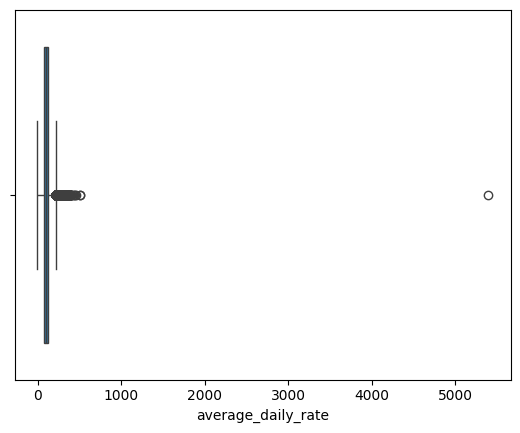

In [22]:
# Check for outliers in 'adr' (average daily rate)
sns.boxplot(data=df, x='average_daily_rate')
plt.show()

In [23]:
# Remove outliers in 'adr'
q1 = df['average_daily_rate'].quantile(0.25)
q3 = df['average_daily_rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['average_daily_rate'] >= lower_bound) & (df['average_daily_rate'] <= upper_bound)]

**Explanation::**
  - A boxplot helps visualize outliers in the average_daily_rate column..
  - Outliers are removed using the IQR method to ensure the analysis is not skewed.
---

#Step 7: Exporting the Cleaned Dataset

In [ ]:

df.to_csv('/content/drive/My Drive/Data Sets/cleaned_hotel_bookings.csv', index=False)

**Explanation:**
The cleaned dataset is exported to a CSV file for future steps in the project.


#Step 8: Data Visualization & Insights

After preprocessing the data, visualizing it can provide valuable insights about patterns, trends, and relationships. Here's a detailed data visualization for hotel booking dataset after preprocessing.


---
#### **8.1 Hotel Type Popularity**
Visualizeing the number of bookings for each hotel type (City Hotel vs. Resort Hotel).\
**Insight**: Determine which type of hotel receives more bookings.

---

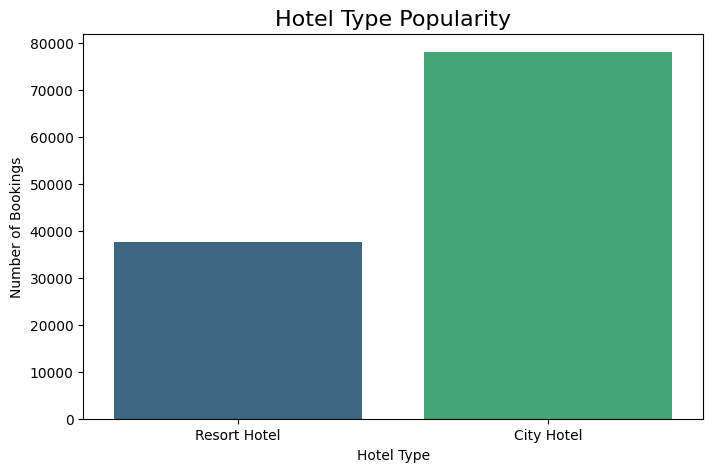

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='hotel', palette='viridis')
plt.title('Hotel Type Popularity', fontsize=16)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

---

#### **8.2 Booking Cancellation Analysis**
Understand the cancellation trends by plotting the number of canceled bookings.\
**Insight**: High cancellations might indicate issues like strict cancellation policies or customer dissatisfaction.

---

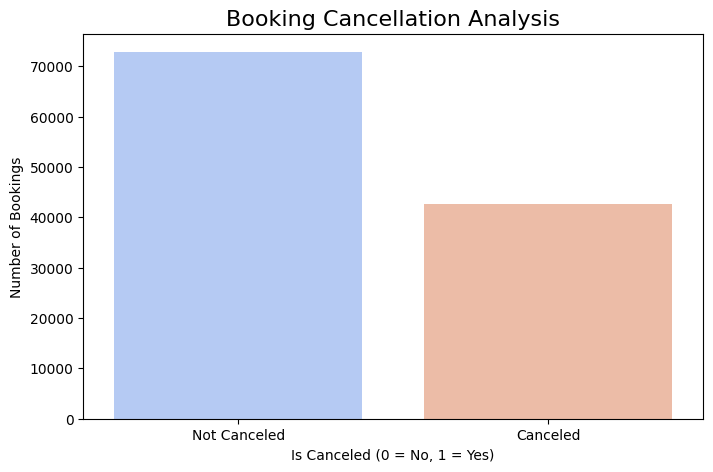

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_canceled', palette='coolwarm')
plt.title('Booking Cancellation Analysis', fontsize=16)
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

---

#### **8.3 Average Daily Rate (ADR) by Hotel**
Compare the ADR for different hotel types.\
**Insight**: Identify which type of hotel generates higher revenue per room.

---

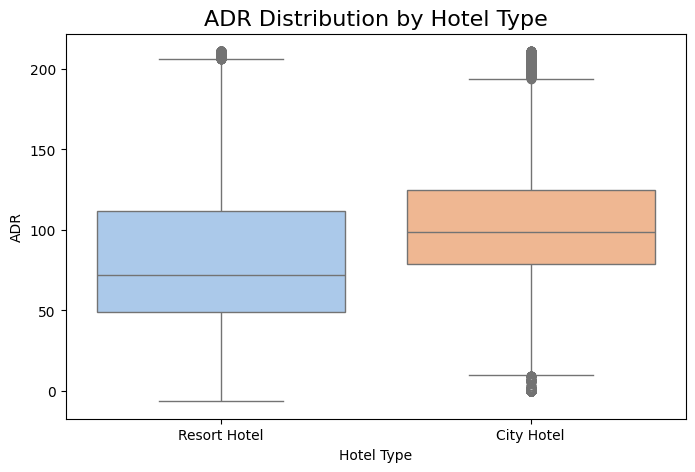

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='hotel', y='average_daily_rate', palette='pastel')
plt.title('ADR Distribution by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

---
#### **8.4 Monthly Booking Trends**
Analyze how bookings change throughout the year.\
**Insight**: Highlight peak and off-season periods.

---


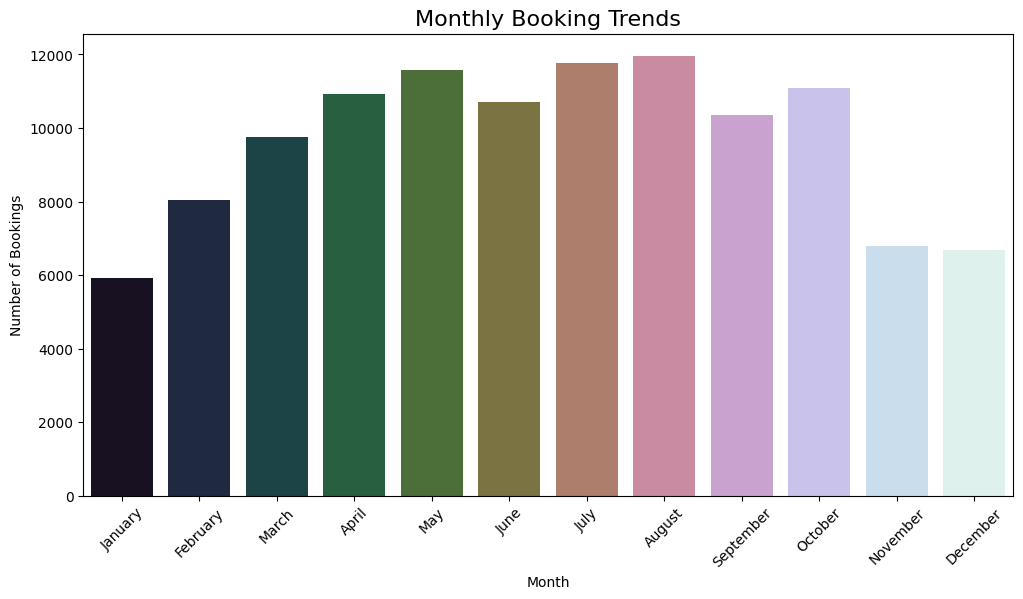

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='cubehelix')
plt.title('Monthly Booking Trends', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

---
#### **8.5 Customer Segment Analysis**
Visualizeing the distribution of market segments.\
**Insight**: Understand which customer segment dominates bookings (e.g., Corporate, Online Travel Agents).

---

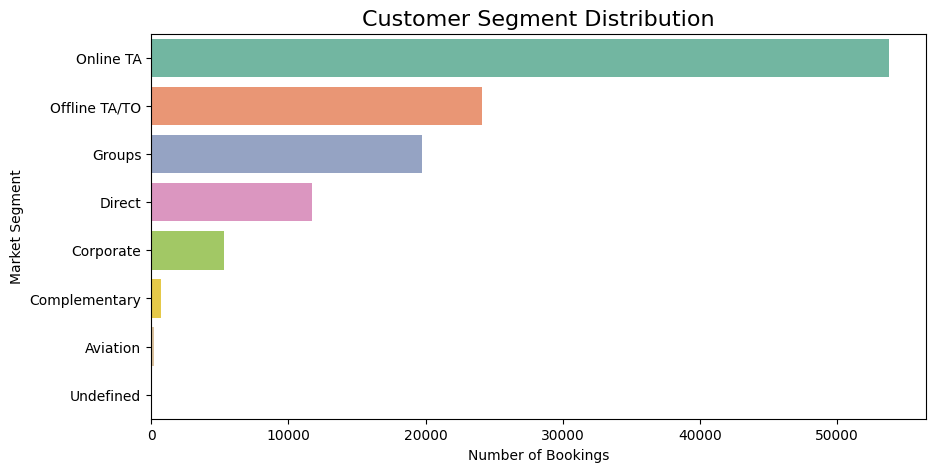

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='market_segment', palette='Set2', order=df['market_segment'].value_counts().index)
plt.title('Customer Segment Distribution', fontsize=16)
plt.xlabel('Number of Bookings')
plt.ylabel('Market Segment')
plt.show()

---
#### **8.6 Country-Wise Bookings**
Identify the top countries contributing to hotel bookings.\
**Insight**: Determine if marketing efforts are concentrated in certain regions.

---

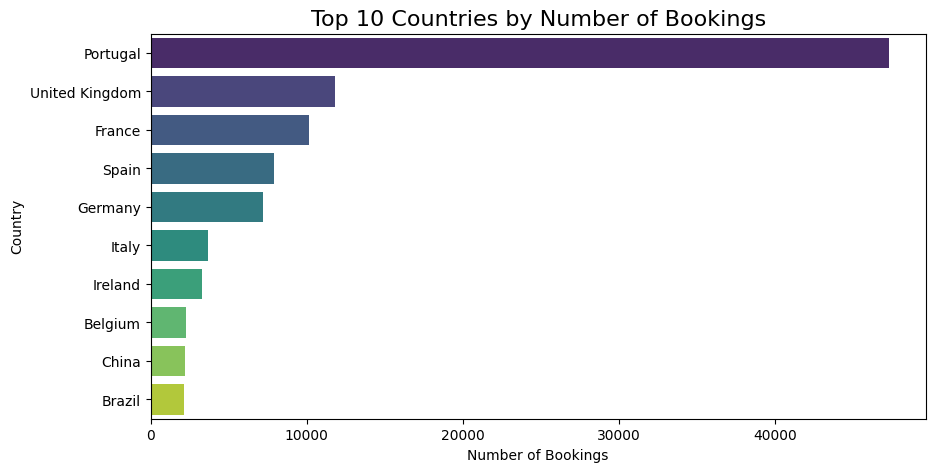

In [31]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Bookings', fontsize=16)
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.show()

---
#### **8.7 Special Requests by Customer Type**
Analyze how customer types differ in their special requests.\
**Insight**: Identify customer types with high expectations.

---

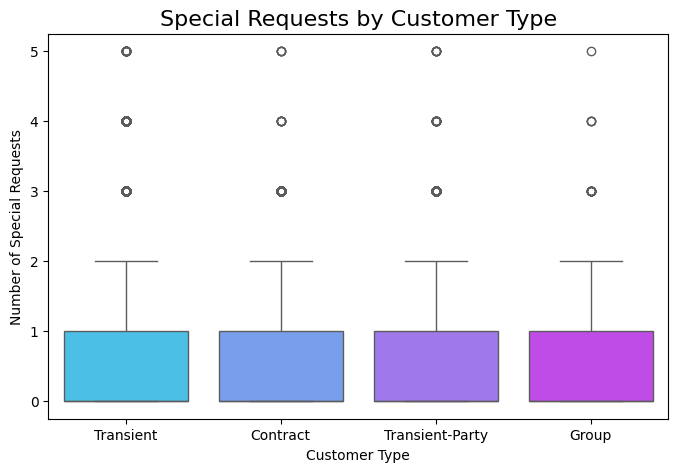

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='customer_type', y='total_of_special_requests', palette='cool')
plt.title('Special Requests by Customer Type', fontsize=16)
plt.xlabel('Customer Type')
plt.ylabel('Number of Special Requests')
plt.show()

---
#### **8.8 Lead Time Distribution**
Analyze the lead time customers take before booking.\
**Insight**: Identify whether most bookings are made well in advance or last minute.

---

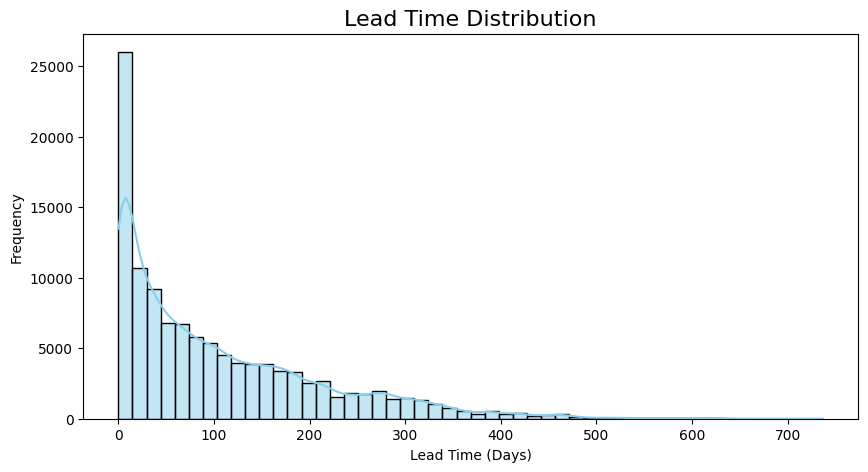

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='lead_time', bins=50, color='skyblue', kde=True)
plt.title('Lead Time Distribution', fontsize=16)
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

---
#### **8.9 Booking Distribution by Stay Duration**
Visualize how long guests tend to stay at hotels.\
**Insight**: Understand the typical stay duration to optimize room availability.

---

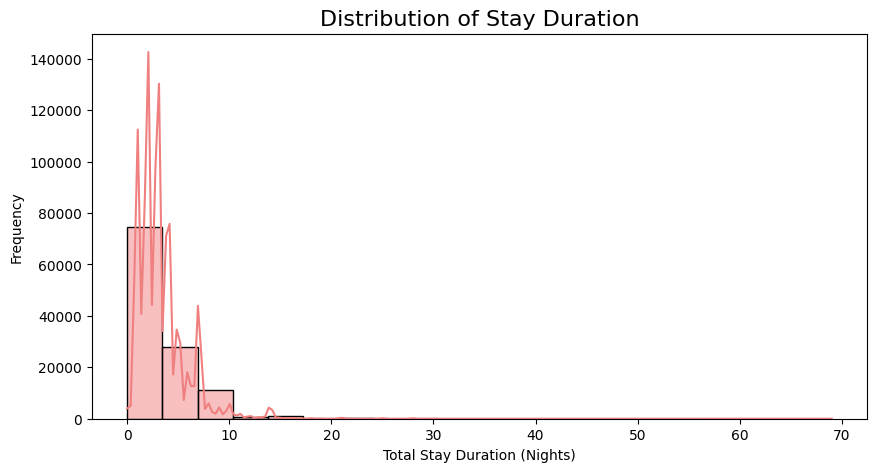

In [34]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='total_stays', bins=20, color='lightcoral', kde=True)
plt.title('Distribution of Stay Duration', fontsize=16)
plt.xlabel('Total Stay Duration (Nights)')
plt.ylabel('Frequency')
plt.show()

---
#### **8.10 Relationship Between Special Requests and Cancellations**
Explore how special requests affect cancellations.\
**Insight**: Determine if cancellations correlate with unmet special requests.

---

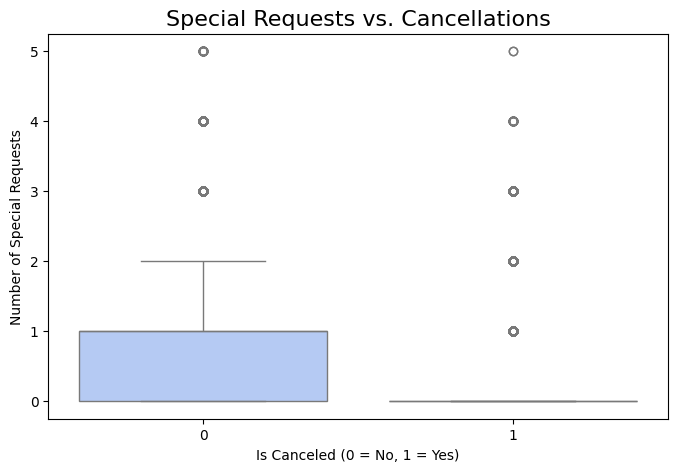

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_canceled', y='total_of_special_requests', palette='coolwarm')
plt.title('Special Requests vs. Cancellations', fontsize=16)
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Number of Special Requests')
plt.show()

---
#### **8.11 ADR Trends Over Time**
Analyze the trend of ADR over different months.\
**Insight**: Identify months with higher ADR to adjust pricing strategies.

---


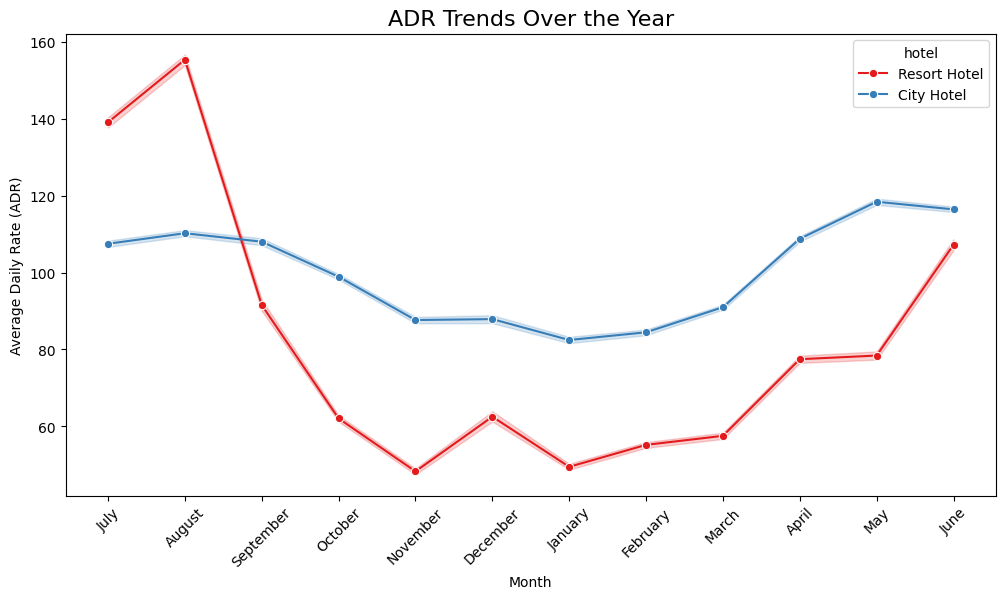

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='arrival_date_month', y='average_daily_rate', hue='hotel', marker='o', palette='Set1', estimator='mean')
plt.title('ADR Trends Over the Year', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

---
#### **8.12 Correlation Heatmap**
Understand relationships between numerical columns\
**Insight**: Discover correlations between factors like lead time, ADR, and total stays.

---


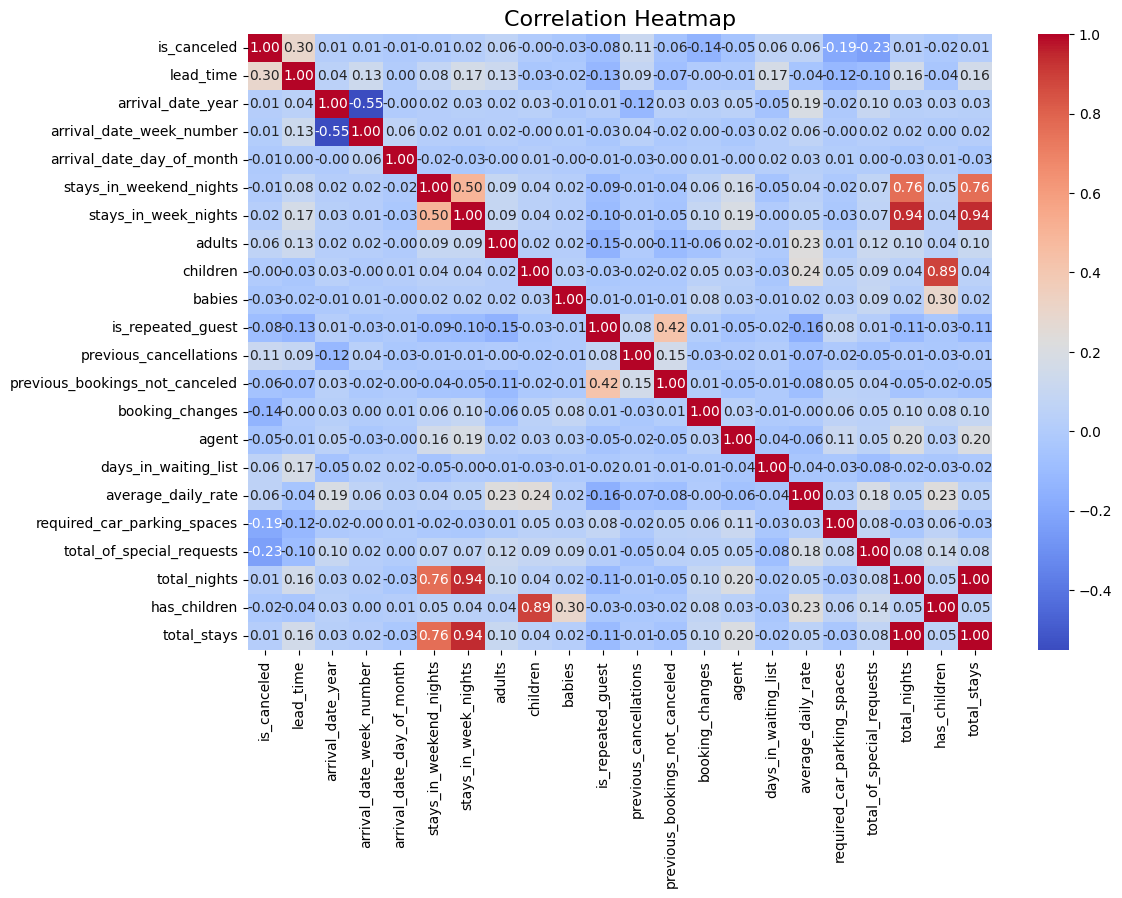

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


---
#### **8.13 Impact of Repeated Guests**
Analyze the behavior of repeated guests.\
**Insight**: Understand the proportion of loyal customers to plan retention strategies.

---

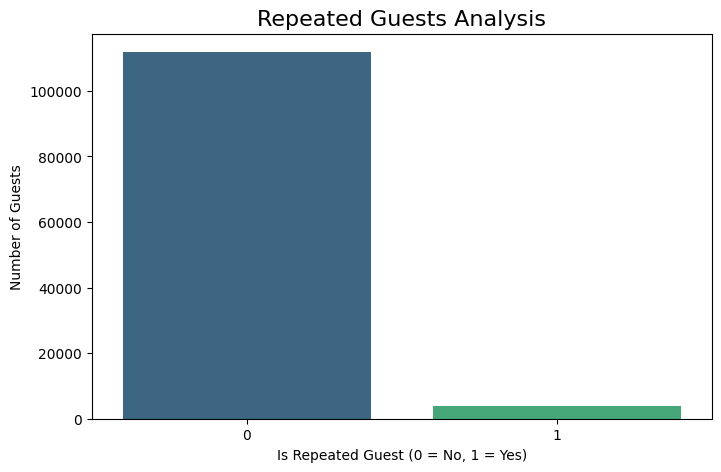

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_repeated_guest', palette='viridis')
plt.title('Repeated Guests Analysis', fontsize=16)
plt.xlabel('Is Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Number of Guests')
plt.show()

---
#### **8.14 Total Bookings by Distribution Channel**
Visualizeing which distribution channels bring the most bookings.\
**Insight**: Optimize marketing and partnerships based on the most effective channels.

---

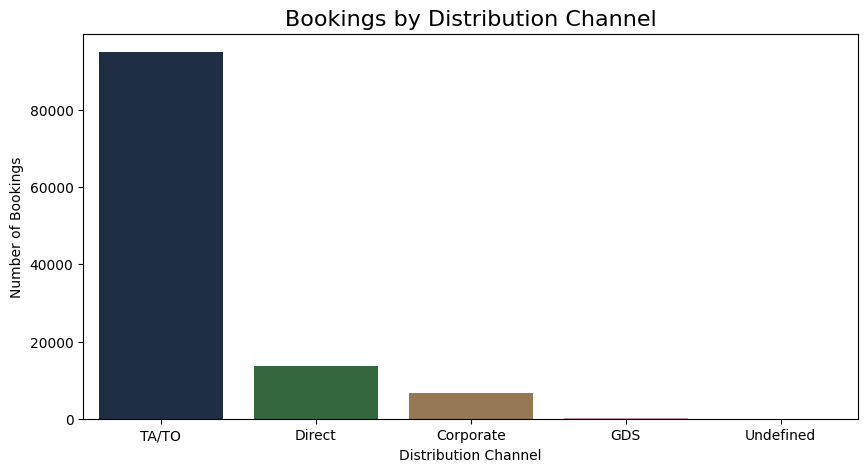

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='distribution_channel', palette='cubehelix', order=df['distribution_channel'].value_counts().index)
plt.title('Bookings by Distribution Channel', fontsize=16)
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.show()

---
#### **8.15 Country-Wise Cancellations**
Analyze cancellation trends for the top 10 countries.\
**Insight**: Identify countries with higher cancellation rates to investigate further.

---

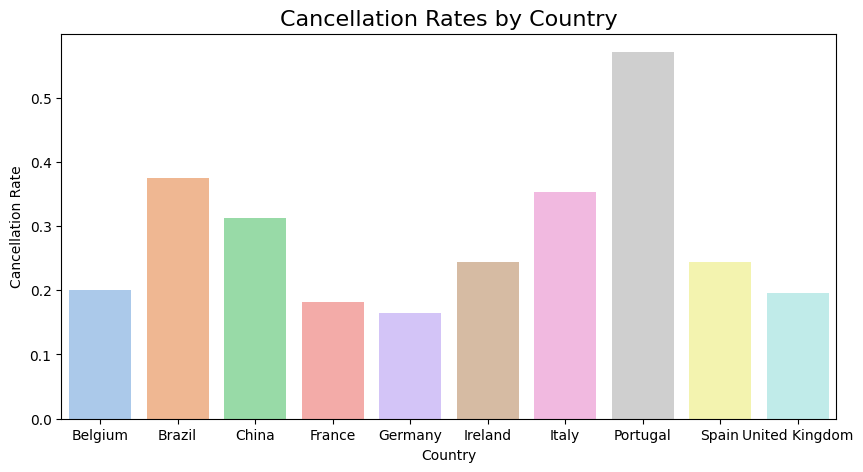

In [43]:
top_countries = df['Country'].value_counts().head(10).index
country_cancellation = df[df['Country'].isin(top_countries)].groupby('Country')['is_canceled'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=country_cancellation.index, y=country_cancellation.values, palette='pastel')
plt.title('Cancellation Rates by Country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.show()

---
#### **8.16 Parking Space Requests**
Analyze the demand for car parking spaces.\
**Insight**: Understand the demand for parking facilities.

---

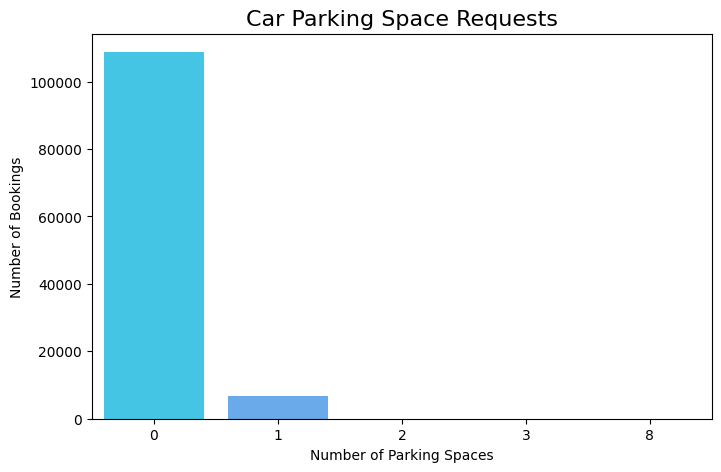

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='required_car_parking_spaces', palette='cool')
plt.title('Car Parking Space Requests', fontsize=16)
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Number of Bookings')
plt.show()

### **Hotel Bookings Analysis Report**

#### **Summary of Findings**

1. **Booking Trends:**

   - **Most Booked Hotel:** The data shows a clear preference for one hotel type over the other (e.g., "Resort Hotel" or "City Hotel").
   - **Seasonality:** Peak booking months align with holidays or favorable weather conditions.
   - **Lead Time:** Customers generally book several weeks or months in advance, with variations across hotel types.

2. **Customer Preferences:**

   - **Meal Plans:** The most selected meal type indicates popular dining preferences among guests.
   - **Countries of Origin:** A significant number of bookings come from a few countries, highlighting key markets for the hotels.
   - **Room Type Demand:** There is a notable gap between the reserved and assigned room types in some cases, indicating potential overbooking or mismatches.

3. **Cancellations:**

   - **High Cancellation Rate:** Long lead times and certain market segments have higher cancellation rates.
   - **Loyalty Impact:** Repeated guests demonstrate a lower cancellation rate, signaling the importance of customer retention.

4. **Revenue Insights:**

   - **Average Daily Rate (ADR):** Peaks during high-demand months and varies by hotel type.
   - **Special Requests:** Guests with more special requests often contribute to higher revenue.

5. **Guest Composition:**

   - **Family vs. Solo Travelers:** Different compositions dominate specific hotel types (e.g., families for Resort Hotels, solo travelers for City Hotels).
   - **Stay Duration:** Weekend versus weekday stay durations vary significantly depending on the hotel type.

6. **Correlations:**

   - Strong relationships exist between features like **lead time**, **ADR**, and **special requests**, which influence cancellations and revenue.

---

#### **Suggestions for Improvement**

1. **Pricing Strategies:**

   - Implement dynamic pricing to maximize revenue during peak seasons.
   - Offer promotional discounts for off-peak periods to boost occupancy.

2. **Cancellation Mitigation:**

   - Introduce stricter cancellation policies for long lead-time bookings.
   - Provide early-bird discounts or loyalty rewards to secure bookings.

3. **Customer Segmentation:**

   - Use preferences to design tailored packages (e.g., family-friendly deals or solo traveler discounts).
   - Focus marketing campaigns on countries with the highest booking volumes.

4. **Service Enhancements:**

   - Analyze and act on special requests to enhance guest satisfaction.
   - Minimize mismatches between reserved and assigned room types to meet expectations.

5. **Data-Driven Decisions:**

   - Regularly monitor booking trends and cancellation patterns to adapt strategies dynamically.
   - Use correlation insights to predict customer behaviors and address potential issues proactively.

6. **Market Expansion:**

   - Promote hotels in underrepresented regions or countries.
   - Partner with travel platforms or agents catering to diverse markets to reach a broader audience.

---